# CNN-LSTM

In [203]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pydot
import graphviz

%matplotlib inline
plt.style.use("ggplot")

In [204]:
#loading dataset

dataset = pd.read_csv('/content/TM.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,121.519997,122.260002,120.169998,121.459999,117.422958,413500
1,2016-01-05,121.540001,121.540001,120.160004,121.139999,117.113594,306400
2,2016-01-06,118.570000,118.800003,117.760002,118.379997,114.445328,277600
3,2016-01-07,116.080002,116.639999,115.459999,115.570000,111.728729,407500
4,2016-01-08,116.320000,116.680000,112.919998,113.059998,109.302155,635800
...,...,...,...,...,...,...,...
1505,2021-12-23,183.080002,184.309998,182.910004,183.779999,183.779999,167800
1506,2021-12-27,184.009995,186.279999,184.009995,185.899994,185.899994,196900
1507,2021-12-28,185.910004,186.369995,184.639999,184.750000,184.750000,113600
1508,2021-12-29,184.259995,184.600006,182.850006,183.679993,183.679993,117800


In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [206]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,130.447702,131.030040,129.762987,130.414788,130.135999,2.391089e+05
std,20.651569,20.764659,20.534552,20.670699,20.962195,1.508528e+05
min,98.230003,99.089996,97.800003,98.269997,96.798271,4.840000e+04
25%,116.922503,117.455002,116.305002,116.904999,116.398706,1.403500e+05
50%,125.360000,125.860000,124.759998,125.314999,125.314999,1.945000e+05
75%,138.024994,138.725002,137.597504,138.254998,138.254998,2.925500e+05
max,187.869995,188.949997,187.139999,187.440002,187.440002,1.415500e+06


In [207]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [208]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,121.519997,122.260002,120.169998,121.459999,117.422958,413500
1,2016-01-05,121.540001,121.540001,120.160004,121.139999,117.113594,306400
2,2016-01-06,118.570000,118.800003,117.760002,118.379997,114.445328,277600
3,2016-01-07,116.080002,116.639999,115.459999,115.570000,111.728729,407500
4,2016-01-08,116.320000,116.680000,112.919998,113.059998,109.302155,635800


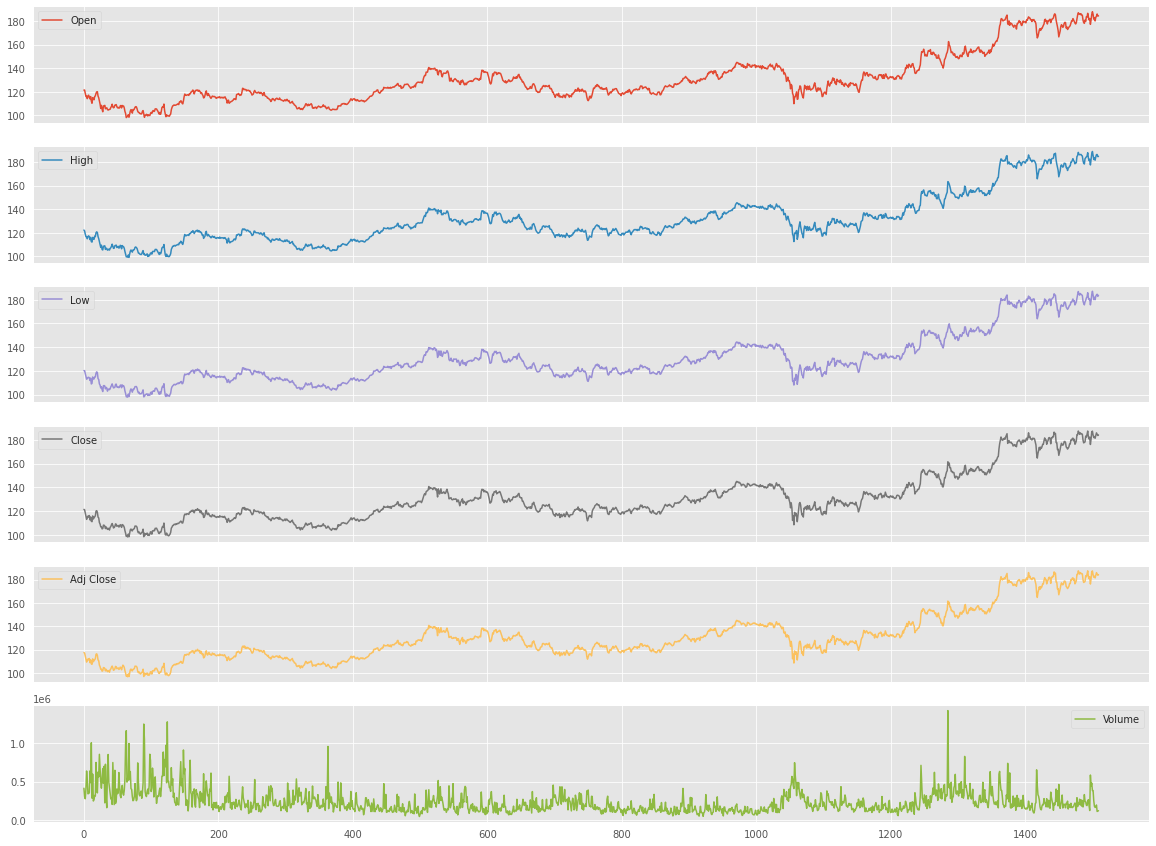

In [209]:
#plotting dataset

dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

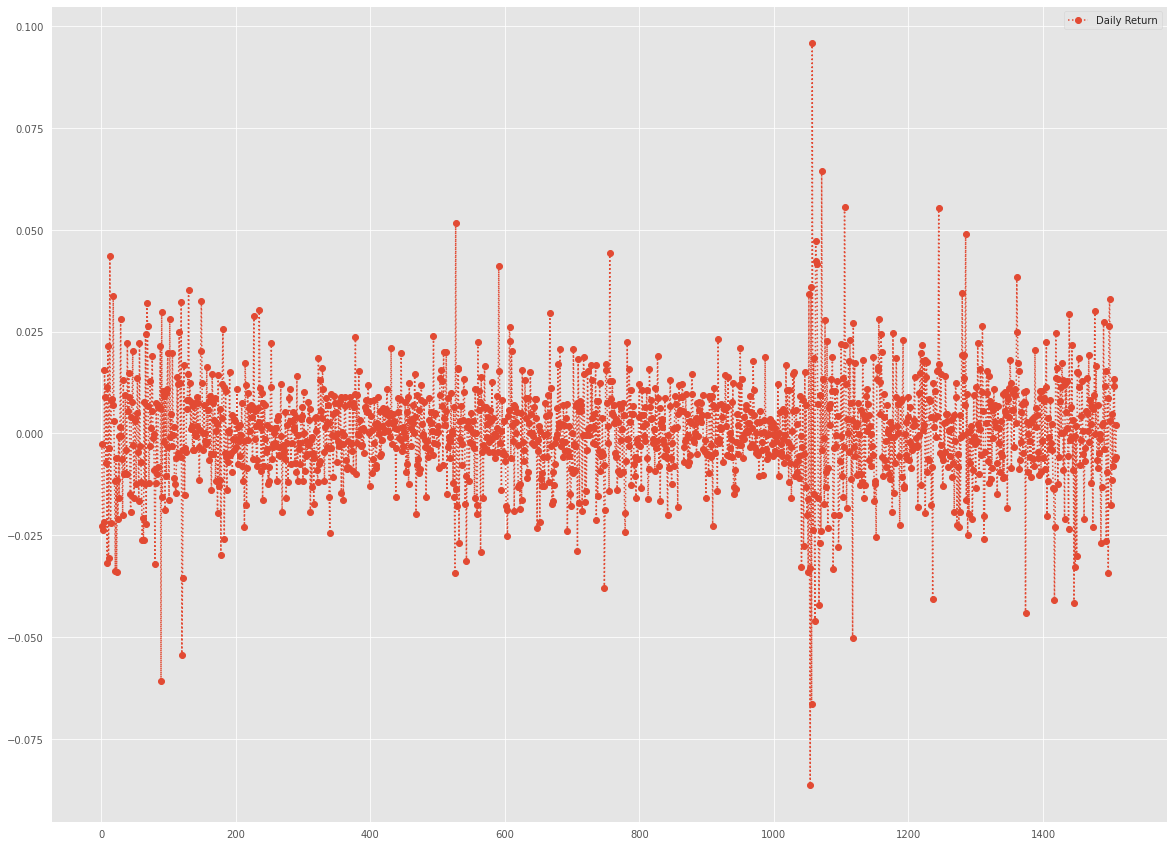

In [210]:
#Adding moving averages to the dataset

m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

# plotting Daily Return

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

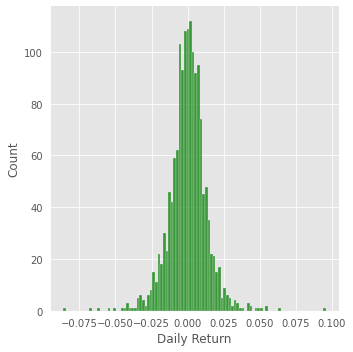

In [211]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [212]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2016-01-04,121.519997,122.260002,120.169998,121.459999,117.422958,413500,130.292146,129.824437,129.370069,0.000361
1,2016-01-05,121.540001,121.540001,120.160004,121.139999,117.113594,306400,130.292146,129.824437,129.370069,-0.002635
2,2016-01-06,118.570000,118.800003,117.760002,118.379997,114.445328,277600,130.292146,129.824437,129.370069,-0.022784
3,2016-01-07,116.080002,116.639999,115.459999,115.570000,111.728729,407500,130.292146,129.824437,129.370069,-0.023737
4,2016-01-08,116.320000,116.680000,112.919998,113.059998,109.302155,635800,130.292146,129.824437,129.370069,-0.021718


In [213]:
dataset.nunique()

Date                  1510
Open                  1276
High                  1305
Low                   1315
Close                 1334
Adj Close             1365
Volume                1226
M_avg for 10 days     1498
M_avg for 50 days     1460
M_avg for 100 days    1411
Daily Return          1506
dtype: int64

In [214]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,117.422958,121.459999,0.000361,2016-01-04,122.260002,120.169998,130.292146,129.370069,129.824437,121.519997,413500
1,117.113594,121.139999,-0.002635,2016-01-05,121.540001,120.160004,130.292146,129.370069,129.824437,121.540001,306400
2,114.445328,118.379997,-0.022784,2016-01-06,118.800003,117.760002,130.292146,129.370069,129.824437,118.570000,277600
3,111.728729,115.570000,-0.023737,2016-01-07,116.639999,115.459999,130.292146,129.370069,129.824437,116.080002,407500
4,109.302155,113.059998,-0.021718,2016-01-08,116.680000,112.919998,130.292146,129.370069,129.824437,116.320000,635800
...,...,...,...,...,...,...,...,...,...,...,...
1505,183.779999,183.779999,0.013344,2021-12-23,184.309998,182.910004,182.728999,179.049900,180.619600,183.080002,167800
1506,185.899994,185.899994,0.011536,2021-12-27,186.279999,184.009995,183.083998,179.087100,180.827400,184.009995,196900
1507,184.750000,184.750000,-0.006186,2021-12-28,186.369995,184.639999,183.946999,179.106000,180.997000,185.910004,113600
1508,183.679993,183.679993,-0.005792,2021-12-29,184.600006,182.850006,184.236998,179.135600,181.099599,184.259995,117800


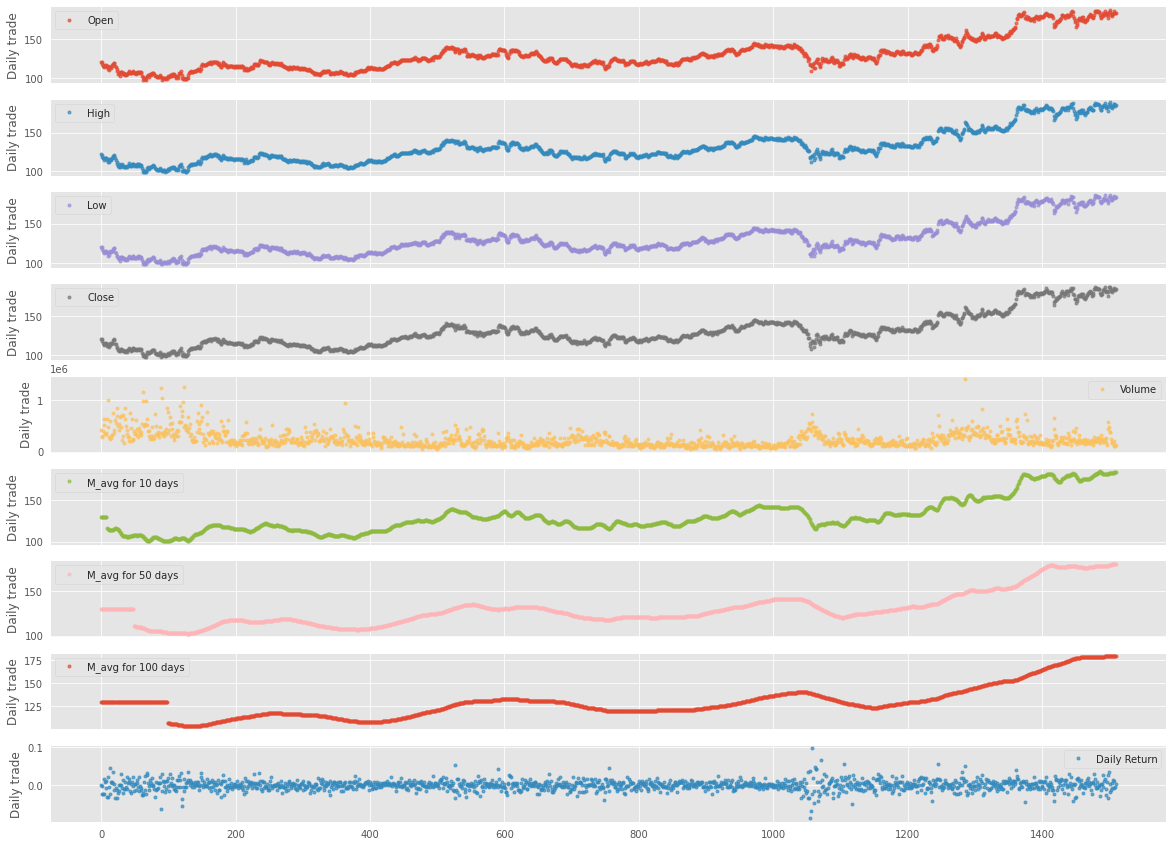

In [215]:
# plotting every column of the dataset

cols_plot = ['Open', 'High', 'Low','Close','Volume','M_avg for 10 days','M_avg for 50 days','M_avg for 100 days','Daily Return']
axes = dataset[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Text(0, 0.5, 'Closing price')

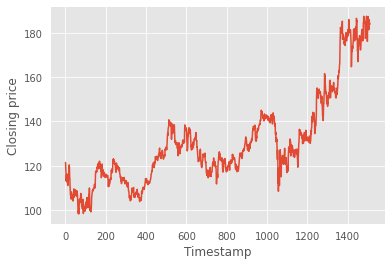

In [216]:
# plotting Close price of the dataset

plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [217]:
df = dataset
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2016-01-04  121.519997  122.260002  120.169998  121.459999  117.422958   
1     2016-01-05  121.540001  121.540001  120.160004  121.139999  117.113594   
2     2016-01-06  118.570000  118.800003  117.760002  118.379997  114.445328   
3     2016-01-07  116.080002  116.639999  115.459999  115.570000  111.728729   
4     2016-01-08  116.320000  116.680000  112.919998  113.059998  109.302155   
...          ...         ...         ...         ...         ...         ...   
1505  2021-12-23  183.080002  184.309998  182.910004  183.779999  183.779999   
1506  2021-12-27  184.009995  186.279999  184.009995  185.899994  185.899994   
1507  2021-12-28  185.910004  186.369995  184.639999  184.750000  184.750000   
1508  2021-12-29  184.259995  184.600006  182.850006  183.679993  183.679993   
1509  2021-12-30  184.270004  184.729996  183.710007  184.080002  184.080002   

      Volume  M_avg for 10 days  M_avg 

In [218]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [219]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1510.0,130.447702,20.651569,98.230003,116.922503,125.360000,138.024994,1.878700e+02
High,1510.0,131.030040,20.764659,99.089996,117.455002,125.860000,138.725002,1.889500e+02
Low,1510.0,129.762987,20.534552,97.800003,116.305002,124.759998,137.597504,1.871400e+02
Close,1510.0,130.414788,20.670699,98.269997,116.904999,125.314999,138.254998,1.874400e+02
Adj Close,1510.0,130.135999,20.962195,96.798271,116.398706,125.314999,138.254998,1.874400e+02
Volume,1510.0,239108.940397,150852.825176,48400.000000,140350.000000,194500.000000,292550.000000,1.415500e+06
M_avg for 10 days,1510.0,130.292146,20.338167,100.298000,116.968499,125.065500,137.414750,1.847830e+02
M_avg for 50 days,1510.0,129.824437,18.988606,102.269000,117.920050,126.442300,135.052499,1.812078e+02
M_avg for 100 days,1510.0,129.370069,17.274447,103.917100,117.512750,127.861450,133.178600,1.791707e+02
Daily Return,1510.0,0.000361,0.013055,-0.086245,-0.006039,0.000475,0.007236,9.576036e-02


In [220]:
df_close = df.reset_index()['Close']

In [221]:
df_close

0       121.459999
1       121.139999
2       118.379997
3       115.570000
4       113.059998
           ...    
1505    183.779999
1506    185.899994
1507    184.750000
1508    183.679993
1509    184.080002
Name: Close, Length: 1510, dtype: float64

In [222]:
# scaling close price of the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [223]:
df_close = pd.DataFrame(df_close)

In [224]:
# Dividing training and test data for plotting

training_size = int(len(df_close)*0.75)
test_size = len(df_close)-training_size
train_data,test_data=df_close.iloc[0:training_size,0],df_close.iloc[training_size:,0]

In [225]:
train_data

0       0.260065
1       0.256476
2       0.225524
3       0.194011
4       0.165863
          ...   
1127    0.330829
1128    0.312773
1129    0.320960
1130    0.306830
1131    0.290120
Name: 0, Length: 1132, dtype: float64

In [226]:
test_data

1132    0.315353
1133    0.321969
1134    0.299316
1135    0.304363
1136    0.286644
          ...   
1505    0.958955
1506    0.982730
1507    0.969833
1508    0.957833
1509    0.962319
Name: 0, Length: 378, dtype: float64

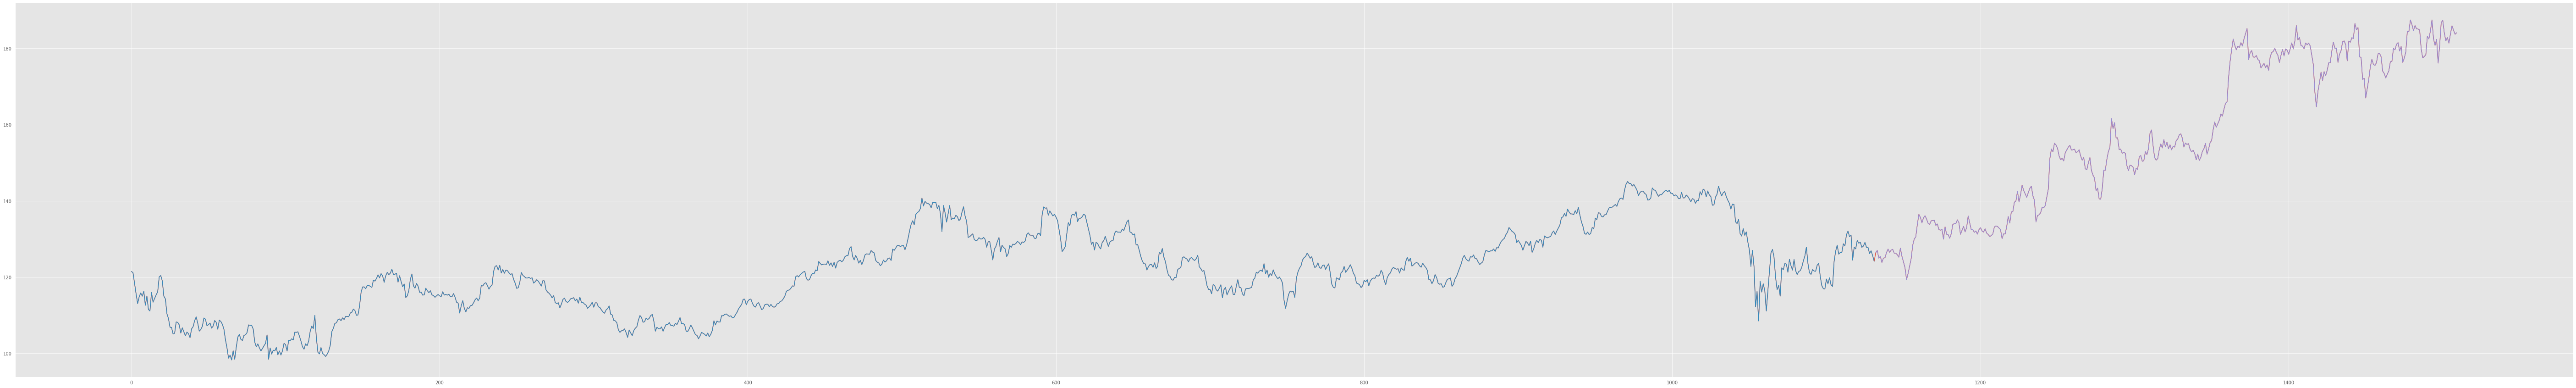

In [227]:
# Plotting training data,test data, and close price of the dataset 
train_dataPlot = np.empty_like(df_close)
train_dataPlot[:, :] = np.nan
train_dataPlot[0:len(train_data),0] = train_data

test_dataPlot = np.empty_like(df_close)
test_dataPlot[:, :] = np.nan
test_dataPlot[len(train_data):len(df_close),0] = test_data

plt.figure(figsize=(100,15))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(scaler.inverse_transform(train_dataPlot))
plt.plot(scaler.inverse_transform(test_dataPlot))

plt.show()

In [228]:
#preparing data in time series format with the help of time step

X = []
Y = []
time_step=100
for i in range(1 , len(df_close) - time_step -1 , 1):
    temp = []
    temp2 = []
    for j in range(time_step):
        temp.append(df_close.iloc[i + j, 0])
    temp2.append(df_close.iloc[i + time_step, 0])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [229]:
#splitting data into train and test for prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

In [230]:
#reshaping data

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [231]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [232]:
# model layers including CNN and LSTM

cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [233]:
#compiling and training the model

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
29/29 [==============================] - 13s 122ms/step - loss: 0.0444 - mse: 0.0444 - mae: 0.1511 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.0904
Epoch 2/40
29/29 [==============================] - 2s 53ms/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0805 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0669
Epoch 3/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0755 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0639
Epoch 4/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0709 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0618
Epoch 5/40
29/29 [==============================] - 1s 49ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0676 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0551
Epoch 6/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0604 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0503
Epoch 7/40
29/29 [==

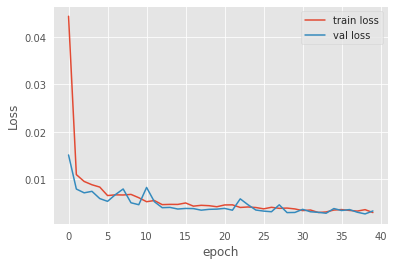

In [234]:
#plotting training and validation loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

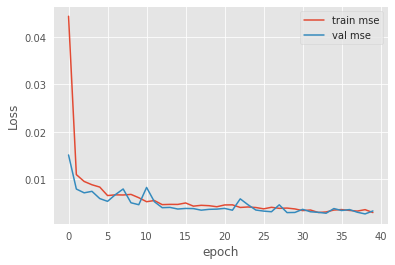

In [235]:
#plotting training and validation MSE

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


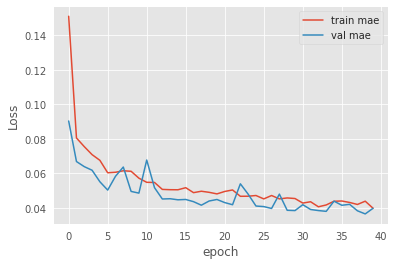

In [236]:
#plotting training and validation MAE

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [237]:
#summary of the CNN-LSTM model

from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_35 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_36 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_37 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_38 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_39 (TimeDi  (None, 1, 21, 128)      

In [238]:
# evaluating the model

cnn_lstm_model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 14ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0398


[0.0032949254382401705, 0.0032949254382401705, 0.039757754653692245]

In [239]:
# calculating variance, R2 score and Max error of the model

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.941761
R2 Score: 0.941761
Max Error: 0.260148


9/9 [==============================] - 0s 13ms/step


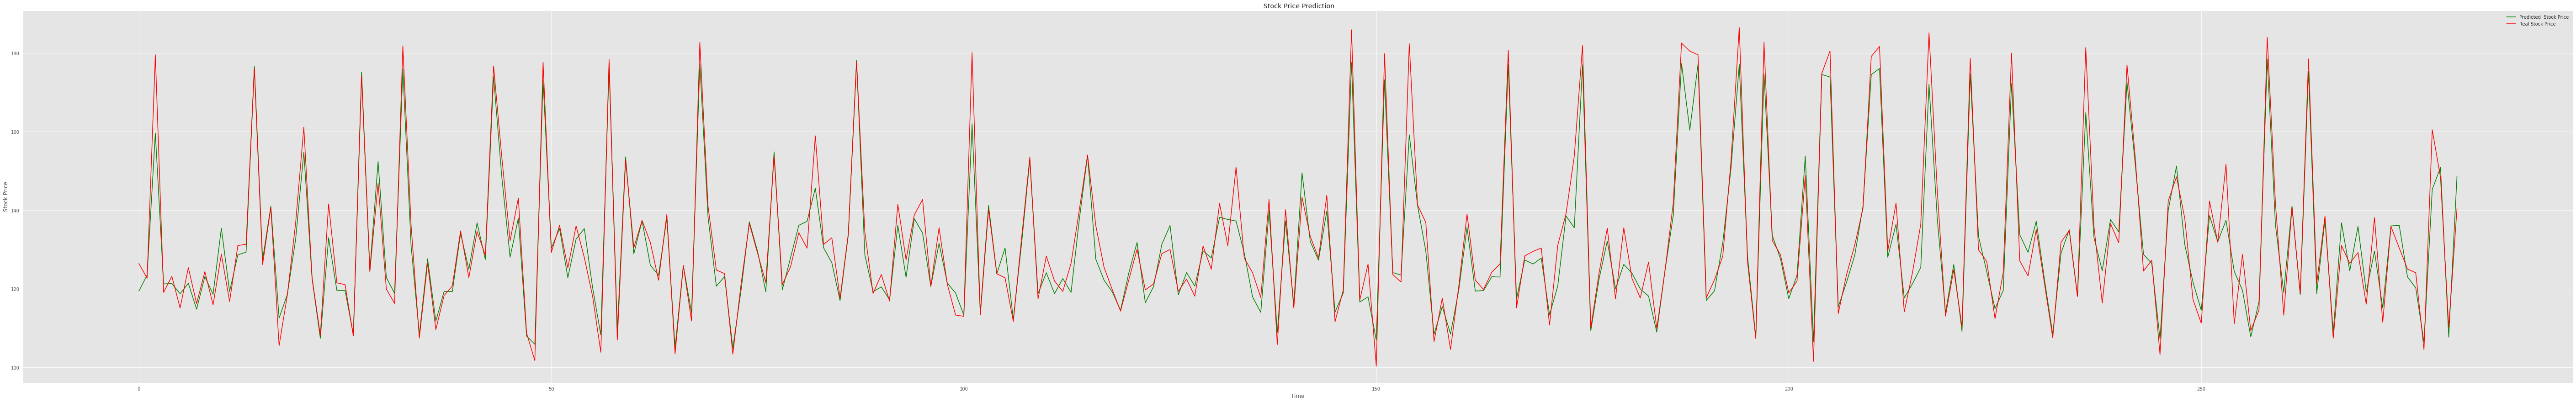

In [240]:
# plotting predicted value and test label

from pylab import rcParams
rcParams['figure.figsize'] = [100,15]

predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
plt.plot(scaler.inverse_transform(predicted), color = 'green', label = 'Predicted  Stock Price')
plt.plot(scaler.inverse_transform(test_label), color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [241]:
scaler.inverse_transform(predicted)

array([[119.39498 ],
       [123.48001 ],
       [159.67567 ],
       [121.22872 ],
       [121.33778 ],
       [118.73229 ],
       [121.3866  ],
       [114.78861 ],
       [123.115685],
       [118.57999 ],
       [135.40688 ],
       [119.26643 ],
       [128.64256 ],
       [129.31195 ],
       [176.63597 ],
       [127.376595],
       [141.04652 ],
       [112.52147 ],
       [118.555145],
       [132.515   ],
       [154.78236 ],
       [122.52137 ],
       [107.371506],
       [132.99956 ],
       [119.599335],
       [119.566925],
       [108.32187 ],
       [175.14041 ],
       [124.65804 ],
       [152.40901 ],
       [122.88501 ],
       [118.80809 ],
       [176.00937 ],
       [130.97154 ],
       [108.35106 ],
       [127.6354  ],
       [111.73037 ],
       [119.32844 ],
       [119.26092 ],
       [134.1316  ],
       [124.9478  ],
       [136.78441 ],
       [127.4625  ],
       [174.00978 ],
       [148.40828 ],
       [128.04805 ],
       [137.95749 ],
       [107.9

In [242]:
scaler.inverse_transform(test_label)

array([[126.449997],
       [122.699997],
       [179.610001],
       [119.07    ],
       [123.190002],
       [115.07    ],
       [125.370003],
       [116.230003],
       [124.360001],
       [115.889999],
       [128.809998],
       [116.760002],
       [131.009995],
       [131.320007],
       [176.119995],
       [126.169998],
       [140.75    ],
       [105.5     ],
       [118.410004],
       [136.660004],
       [161.160004],
       [122.769997],
       [108.139999],
       [141.619995],
       [121.519997],
       [121.040001],
       [107.980003],
       [174.229996],
       [124.370003],
       [146.850006],
       [119.919998],
       [116.279999],
       [181.880005],
       [136.210007],
       [107.449997],
       [126.489998],
       [109.599998],
       [118.290001],
       [120.699997],
       [134.759995],
       [122.839996],
       [134.600006],
       [128.529999],
       [176.729996],
       [153.449997],
       [132.210007],
       [143.070007],
       [108.7